In [28]:
import sys
sys.path.insert(0, '..')

import math
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

from models.Informer import Informer
from core.multimodal.dataset2 import VGDataset

In [29]:
train_dataset = VGDataset('/home/mariia/AstroML/data/asassn', 'v.csv')
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=False)

train split is selected: 529137 objects left.


In [5]:
model = Informer(enc_in=3, d_model=128, dropout=0, n_heads=4, d_ff=512, e_layers=2, seq_len=200, num_class=train_dataset.num_classes)

In [18]:
X, mask, y = next(iter(train_dataloader))
out = model(X, mask)
out

tensor([[ 0.2602,  0.2340,  0.7290,  ..., -0.2247,  0.1738,  0.2666],
        [ 0.2276,  0.4602,  0.9707,  ..., -0.3749,  0.2888,  0.2229],
        [ 0.3188,  0.1586,  0.7038,  ..., -0.0565,  0.1362,  0.0704],
        ...,
        [ 0.1672,  0.4951,  0.9257,  ..., -0.2949,  0.3365,  0.2966],
        [ 0.1181,  0.3007,  0.8226,  ..., -0.0972,  0.1375,  0.2275],
        [ 0.1818,  0.5038,  0.9037,  ..., -0.3461,  0.3378,  0.3156]],
       grad_fn=<AddmmBackward0>)

In [32]:
X.shape

torch.Size([16, 200, 3])

In [30]:
for i in tqdm(range(len(train_dataset))):
    try:
        train_dataset[i]
    except:
        print(i)
        break

  1%|▊                                                                         | 5464/529137 [00:21<33:33, 260.06it/s]

5464


In [31]:
train_dataset[5464]

(array([[ 0.        , -1.0154247 ,  0.00244031],
        [ 0.00154684, -1.0065299 ,  0.00252873],
        [ 0.00230919, -1.0122948 ,  0.00247568],
        [ 0.00384567, -1.012896  ,  0.00247568],
        [ 0.01848373, -1.0076793 ,  0.00251105],
        [ 0.02617582, -1.0217377 ,  0.00238726],
        [ 0.04230471, -1.0199339 ,  0.00240494],
        [ 0.04459229, -1.016468  ,  0.00244031],
        [ 0.04538639, -1.0096422 ,  0.00249336],
        [ 0.04616411, -1.0119411 ,  0.00247568],
        [ 0.06537113, -1.0165387 ,  0.00242263],
        [ 0.06843538, -1.0119057 ,  0.00247568],
        [ 0.06919379, -1.0197217 ,  0.00240494],
        [ 0.0784478 , -0.99282527,  0.0026702 ],
        [ 0.07917259, -0.99906754,  0.00259946],
        [ 0.0868792 , -1.0078031 ,  0.00251105],
        [ 0.08766127, -1.0138155 ,  0.00245799],
        [ 0.08919787, -1.0177412 ,  0.00242263],
        [ 0.09150133, -1.0208181 ,  0.00238726],
        [ 0.09533295, -1.0056634 ,  0.00254641],
        [ 0.1014856 

In [25]:
train_dataset.df.iloc[65]

target                             SR
period                      49.754134
name      ASASSN-VJ075659.95-374113.1
id           EDR3 5538261823127640576
band                                v
Name: 85, dtype: object

In [27]:
train_dataset.get_vlc('ASASSN-VJ075659.95-374113.1')

array([], shape=(0, 3), dtype=float64)

In [ ]:
df = pd.open_csv('')

In [33]:
max_len = 5000
d_model = 128
seq_len = 200

pe = torch.zeros(max_len, d_model).float()
position = torch.arange(0, max_len).float().unsqueeze(1)
div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

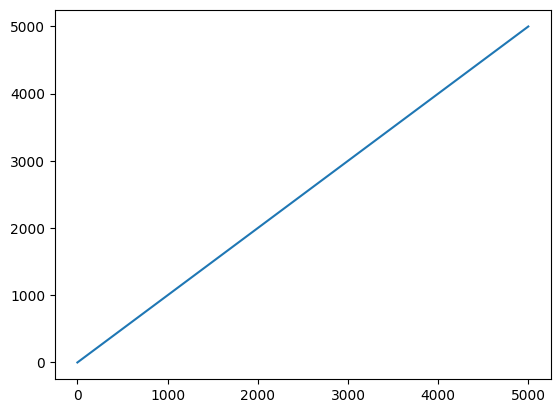

In [10]:
plt.plot(position[:, 0])

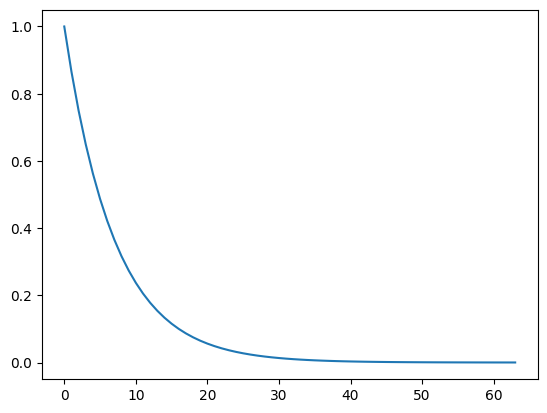

In [12]:
plt.plot(div_term)

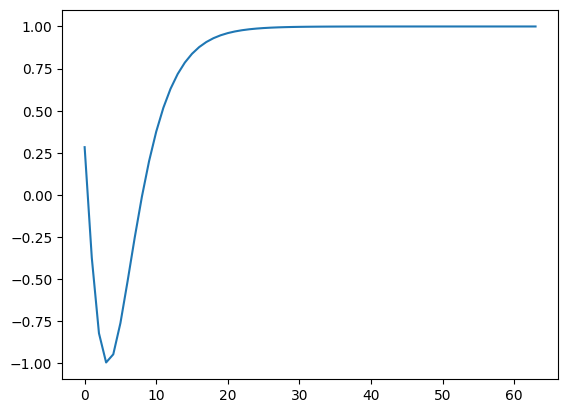

In [24]:
plt.plot(torch.cos(position * div_term)[5])

In [35]:
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)

In [37]:
pe = pe[:seq_len]

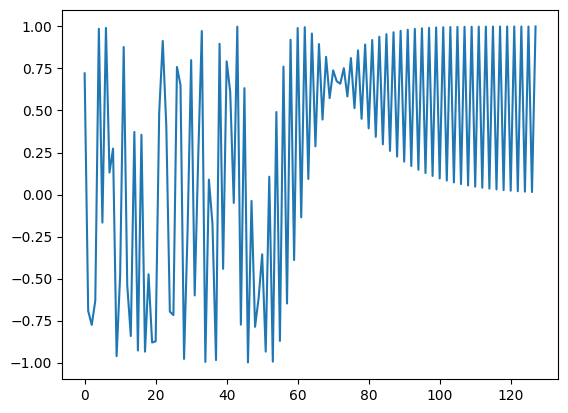

In [54]:
plt.plot(pe[128])